In [3]:
import numpy as np
import matplotlib.pyplot as pl

In [6]:
#I misunderstood the task A. But at least now I know that to check if 4 points are coplanar you do this:

def CoPlanarTest (r1,r2,r3,r4):

    A = [[r4[0]-r1[0],r4[1]-r1[1], r4[2]-r1[2]],[r4[0]-r2[0],r4[1]-r2[1], r4[2]-r2[2]],[r4[0]-r3[0],r4[1]-r3[1], r4[2]-r3[2]]]
    print(A)
    b = np.linalg.det(A)
    print(b)
    if b != 0:
         print("The fourth point is not co-planar with the 3 known points")
    else:
        print("You good, the fourth is also coplanar")

r1 = [1,1,1]
r2 = [1,2,2]
r3 = [1,3,0]
r4 = [1,4,0] 
CoPlanarTest(r1,r2,r3,r4)

[[0, 3, -1], [0, 2, -2], [0, 1, 0]]
0.0
You good, the fourth is also coplanar


In [7]:
#TASK A
#Nearest neighbour method
#Note you only have to do this in 2D, so no need to check if the points are co-planar

def TrNN (r1,r2,r3,f1,f2,f3,r4):
    
    #Calculating the weights for each direction based on the distance between the point of interest and the points known
    w = []
    w.append(1/(np.sqrt((r1[0] - r4[0]) ** 2 + (r1[1] - r4[1]) ** 2)))
    w.append(1/(np.sqrt((r2[0] - r4[0]) ** 2 + (r2[1] - r4[1]) ** 2)))    
    w.append(1/(np.sqrt((r3[0] - r4[0]) ** 2 + (r3[1] - r4[1]) ** 2)))
    
    #Caclulating the weighted average at the point of interest
    f4 = (w[0] * f1 + w[1] * f2 + w[2] * f3) / (w[0] + w[1] + w[2])
    
    return f4
                                            
                                                 
#Defining the known points:
r1 = [0,0]
r2 = [1,1]
r3 = [2,0]
#Defining the values of the unkown function at these known points:
f1 = 0
f2 = 1
f3 = 3
#Defining the point of interest
r4 = [1,0.5]

#Printing the result                                                 
print(f"The funtction takes a value of {TrNN(r1,r2,r3,f1,f2,f3,r4)}  at the point you wanted")
                        

The funtction takes a value of 1.2360679774997898  at the point you wanted


In [8]:
#TASK B
#Do the same but for barycentric coordinates

def TrBaryc (r1,r2,r3,f1,f2,f3,r4):
    
    #Instead of doing the matrix manipulations, I just put in the algebraic result to find the lambda values:
    lamda1 = (((r2[1] - r3[1]) * (r4[0] -r3[0]) + (r3[0]-r2[0]) * (r4[1] - r3[1])) / (((r2[1] - r3[1]) * (r1[0] - r3[0])) + (r3[0] - r2[0]) * (r1[1] - r3[1])))
    lamda2 = (((r3[1] - r1[1]) * (r4[0] -r3[0]) + (r1[0]-r3[0]) * (r4[1] - r3[1])) / (((r2[1] - r3[1]) * (r1[0] - r3[0])) + (r3[0] - r2[0]) * (r1[1] - r3[1])))
    lamda3 = 1 - lamda1 - lamda2
    
    #Caclulating the weighted average at the point of interest
    f4 = lamda1 * f1 + lamda2 * f2 + lamda3 * f3
    
    return f4

#Defining the known points:
r1 = [0,0]
r2 = [1,1]
r3 = [2,0]
#Defining the values of the unkown function at these known points:
f1 = 0
f2 = 1
f3 = 3
#Defining the point of interest
r4 = [1,0.5] 

#Printing the result
print(f"The funtction takes a value of {TrBaryc(r1,r2,r3,f1,f2,f3,r4)}  at the point you wanted")

The funtction takes a value of 1.25  at the point you wanted


[0.0, 7.048947700274529, 21.146843100823588, 35.24473850137265, 49.3426339019217, 63.44052930247076, 77.53842470301981, 91.63632010356888, 105.73421550411794, 119.83211090466698, 133.93000630521604, 148.0279017057651, 162.12579710631417, 176.22369250686324, 190.32158790741232, 204.41948330796134, 218.51737870851042, 232.61527410905947, 246.71316950960852, 260.8110649101576]
20


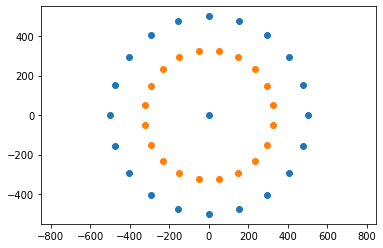

In [38]:
#TASK C

#Choosing the number of nodes:
N = 20
#Choosing the radius of the circle:
R = 500

#Defining the arrays that will hold all the points x and y coordinates (the center of the circle will be added ad default):
rx = [0]
ry = [0]

#Finding the vlaues of the points on the mesh
for i in range(N):
    x_ = R * np.cos(i * (2 * np.pi) / N)
    y_ = R * np.sin(i * (2 * np.pi) / N)
    rx.append(x_)
    ry.append(y_)

#Plotting it to make sure alls fine :D
pl.axis('equal')
pl.scatter(rx, ry)

#Defining the array that will hold all the values of the fucntion at the given points (the center of the circle will be added ad default):
f = [0]

for i in range(N):
    f_ = i * 360/N
    f.append(f_)
    
#Defining the fuction that can give us the central node in a tiangular mesh

def centroid(rx1, ry1, rx2, ry2, rx3, ry3):
    rx4 = (rx1 + rx2 + rx3) / 3
    ry4 = (ry1 + ry2 + ry3) / 3
    r4 = (rx4, ry4)
    return r4
    
#Generating a new set of lists for all of the central points:
cx = []
cy = []

#Filling this up:

for i in range(0, N):
    if i == 0:
        r4 = centroid(rx[0], ry[0], rx[i+1], ry[i+1], rx[i-1], ry[i-1])
        cx.append(r4[0])
        cy.append(r4[1])
    else:
        r4 = centroid(rx[0], ry[0], rx[i], ry[i], rx[i+1], ry[i+1])
        cx.append(r4[0])
        cy.append(r4[1])

#Plotting it to make sure alls fine :D
pl.scatter(cx,cy)


#Interpolating for each of these nodes:

f_centroids = [] #Defining the array which will hold the interpolated values

for i in range(len(cx)):
    f4_ = TrNN((rx[0], ry[0]), (rx[i], ry[i]), (rx[i+1], ry[i+1]), f[0], f[i], f[i+1], (cx[i], cy[i]))
    #Or alternatively with barycentric:
    #f4_ = TrBaryc((rx[0], ry[0]), (rx[i], ry[i]), (rx[i+1], ry[i+1]), f[0], f[i], f[i+1], (cx[i], cy[i]))
    f_centroids.append(f4_)
    
print(f_centroids)
print(len(f_centroids))

